**Imported packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import f1_score, fbeta_score
import matplotlib.pyplot as plt




In [2]:
df=pd.read_csv("new_results.csv")


In [3]:
df.head()

,Unnamed: 0,Season,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,...,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H
0,2091,2012-13,0,0,0,0,5,11,1,7,...,0,0,0,0,0,1,0,0,1,0
1,4407,2014-15,5,0,3,0,16,8,9,1,...,0,0,0,0,0,0,1,0,0,1
2,7459,2005-06,4,0,1,0,11,11,8,6,...,0,0,0,0,0,0,1,0,0,1
3,2832,2019-20,0,2,0,0,18,13,7,5,...,0,0,0,0,1,0,0,0,1,0
4,7214,2014-15,0,1,0,0,7,10,1,4,...,1,0,0,0,1,0,0,0,1,0


In [4]:
df.shape

(6806, 105)

**Splitting data to feature and target**

In [5]:
feature=df.drop(["Season","N_FTR","Unnamed: 0"],axis = 1)
target=df["N_FTR"]

In [6]:
df.head()

,Unnamed: 0,Season,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,...,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H
0,2091,2012-13,0,0,0,0,5,11,1,7,...,0,0,0,0,0,1,0,0,1,0
1,4407,2014-15,5,0,3,0,16,8,9,1,...,0,0,0,0,0,0,1,0,0,1
2,7459,2005-06,4,0,1,0,11,11,8,6,...,0,0,0,0,0,0,1,0,0,1
3,2832,2019-20,0,2,0,0,18,13,7,5,...,0,0,0,0,1,0,0,0,1,0
4,7214,2014-15,0,1,0,0,7,10,1,4,...,1,0,0,0,1,0,0,0,1,0


In [7]:
target

0       2
1       2
2       0
3       2
4       1
       ..
6801    2
6802    2
6803    1
6804    2
6805    0
Name: N_FTR, Length: 6806, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6806.0,4158.442110,2396.834744,1.0,2118.25,4192.5,6251.75,8287.0
FTHG,6806.0,1.523803,1.288829,0.0,1.00,1.0,2.00,9.0
FTAG,6806.0,1.141787,1.134728,0.0,0.00,1.0,2.00,9.0
HTHG,6806.0,0.688804,0.830966,0.0,0.00,0.0,1.00,5.0
HTAG,6806.0,0.501175,0.715268,0.0,0.00,0.0,1.00,5.0
...,...,...,...,...,...,...,...,...
FTR_D,6806.0,0.251396,0.433847,0.0,0.00,0.0,1.00,1.0
FTR_H,6806.0,0.462827,0.498653,0.0,0.00,0.0,1.00,1.0
HTR_A,6806.0,0.233617,0.423163,0.0,0.00,0.0,0.00,1.0
HTR_D,6806.0,0.412430,0.492308,0.0,0.00,0.0,1.00,1.0


# **Data Preparation**

**Spliting Data to train and test**

In [9]:
feature.head()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,...,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H
0,0,0,0,0,5,11,1,7,6,11,...,0,0,0,0,0,1,0,0,1,0
1,5,0,3,0,16,8,9,1,7,3,...,0,0,0,0,0,0,1,0,0,1
2,4,0,1,0,11,11,8,6,4,8,...,0,0,0,0,0,0,1,0,0,1
3,0,2,0,0,18,13,7,5,7,7,...,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,7,10,1,4,9,7,...,1,0,0,0,1,0,0,0,1,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(feature, target,test_size= 0.20,random_state =42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (5444, 102)
X_test shape: (1362, 102)


In [11]:
tree_param = {'criterion': ['entropy', 'gini'], 'max_depth':np.arange(1,20,1),
              'min_samples_leaf':np.arange (1,40,2)}


In [12]:
clf = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

In [13]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [14]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5}

In [15]:
clf2=DecisionTreeClassifier(criterion=clf.best_estimator_.get_params()['criterion']
                            ,max_depth=clf.best_estimator_.get_params()['max_depth'],
                            min_samples_leaf=clf.best_estimator_.get_params()['min_samples_leaf'])

In [16]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)

In [17]:
y_pred = clf2.predict(X_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.48      0.47       438
           1       0.50      0.00      0.01       317
           2       0.52      0.78      0.63       607

    accuracy                           0.50      1362
   macro avg       0.49      0.42      0.37      1362
weighted avg       0.50      0.50      0.43      1362



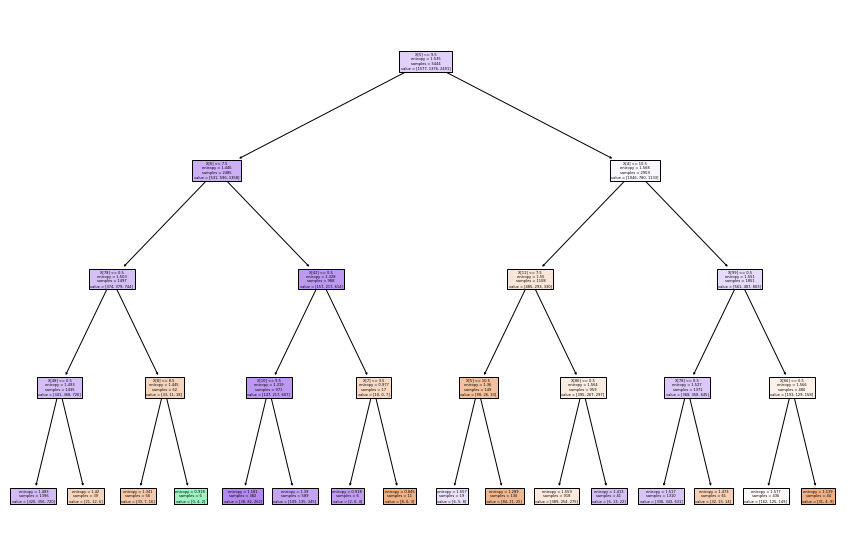

In [19]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf2,filled=True)
plt.show()


# **Checking accuracy of testing dataset**

In [20]:
predictions_test=clf2.predict(X_test)
Test_accuracy=accuracy_score(y_test, predictions_test)
Test_accuracy

0.5014684287812041

In [21]:
print(classification_report(y_test,predictions_test))


              precision    recall  f1-score   support

           0       0.46      0.48      0.47       438
           1       0.50      0.00      0.01       317
           2       0.52      0.78      0.63       607

    accuracy                           0.50      1362
   macro avg       0.49      0.42      0.37      1362
weighted avg       0.50      0.50      0.43      1362



# **Checking accuracy of training dataset**

In [22]:
predictions_train = clf2.predict(X_train)
Train_accuracy=accuracy_score(y_train,predictions_train)
Train_accuracy

0.5062454077883909

In [23]:
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

           0       0.45      0.48      0.46      1577
           1       0.67      0.00      0.01      1376
           2       0.53      0.80      0.64      2491

    accuracy                           0.51      5444
   macro avg       0.55      0.43      0.37      5444
weighted avg       0.54      0.51      0.43      5444

